In [25]:
# 위스콘신 유방암 데이터 로딩
import numpy as np
import pandas as pd
df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
# 데이터와 레이블 분리 추출
X=df.iloc[:,2:].values #array로 추출
y=df.iloc[:,1].values
# print(f'X shape : {X.shape}')
# print(f'y shape : {y.shape}')
# print(f'unique y : {np.unique(y)}')

# label을 숫자 변환 : 0,1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y) # y값을 입력해서 변환(0,1)하고 다시 y에 대입
# print(f'unique y : {np.unique(y)}')

# 학습데이터/테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

# print(f'X_train.shape : {X_train.shape}')
# print(f'X_test.shape : {X_test.shape}')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline # 함수

pipe_lr = make_pipeline(
    StandardScaler()
    , PCA(n_components=2)
    ,LogisticRegression(random_state=1)
)

pipe_lr.fit(X_train,y_train)
# StandardScaler.fit(X_train)되고 StandardScaler.transform(X_train) 되고 pca.fit(X_train)되고 pca.transform(X_train)되고 lr.fit(X_train,y_train)
# 학습 종료 : 모델이 완성
y_pred=pipe_lr.predict(X_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
# print(f'정확도 : {acc}')

from sklearn import  set_config
set_config(
    display='diagram'
)
# pipe_lr
from  sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(
    n_splits=10 # 모델이 10개 나온다 -> 정확도 10이다
).split(X_train,y_train)

scores=[]

print(f'X_train shape : {X_train.shape}')
for k,(train,test) in enumerate(kfold):
    # print(f'k : {k}, train shape : {train.shape}, test shape : {test.shape}')
    pipe_lr.fit(
        X_train[train]
        ,y_train[train]
    )
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)

print(scores)
print(f'평균 값은 : {np.mean(scores)}')

X_train shape : (455, 30)
[0.9347826086956522, 0.9347826086956522, 0.9565217391304348, 0.9565217391304348, 0.9347826086956522, 0.9555555555555556, 0.9777777777777777, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556]
평균 값은 : 0.9495169082125603


In [19]:
import numpy as np
import pandas as pd
df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X=df.iloc[:,2:].values 
y=df.iloc[:,1].values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 

pipe_lr = make_pipeline(
    StandardScaler()
    , PCA(n_components=2)
    ,LogisticRegression(random_state=1)
)

pipe_lr.fit(X_train,y_train)
y_pred=pipe_lr.predict(X_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)

from sklearn import  set_config
set_config(
    display='diagram'
)
from  sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(
    n_splits=10
).split(X_train,y_train)

scores=[]

for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(
        X_train[train]
        ,y_train[train]
    )
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)

# cross_val_score
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(
    estimator=pipe_lr
    , X=X_train
    ,y=y_train
    ,cv=10 # 10 k-fold
    ,n_jobs=1
)
print('='*50)
print(f'cross_val_score\n{cv_scores}')
print('='*50)

print(f'CV 정확도 점수 : {np.mean(cv_scores)}')
print('='*50)

# cross_validate() : scoring -> 평가 지표 설정
from sklearn.model_selection import cross_validate

val_scores=cross_validate(
    estimator=pipe_lr
    ,X=X_train
    ,y=y_train
    ,scoring=['accuracy']
    ,cv=10
    ,n_jobs=-1
)

print(f'cross_validate\n{val_scores}')
print('='*50)
print(f"val_scores['test_accuracy'] : {val_scores['test_accuracy']}")
print('='*50)
print(f"val_scores['test_accuracy'] : {val_scores['test_accuracy']}")
print(f"np.mean(val_scores['test_accuracy']) : {np.mean(val_scores['test_accuracy'])}")

# cross_val_predict() : method -> 
from sklearn.model_selection import cross_val_predict
preds=cross_val_predict(
    estimator=pipe_lr
    ,X=X_train
    , y = y_train
    ,cv=10
    ,method='predict_proba'
    ,n_jobs=-1
)
print(f'preds :\n {preds}')
print(f'preds의 갯수 : {len(preds)}')


cross_val_score
[0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV 정확도 점수 : 0.9495169082125603
cross_validate
{'fit_time': array([0.00800991, 0.00701094, 0.00901127, 0.00701118, 0.00700951,
       0.00800967, 0.00800157, 0.00899625, 0.0079937 , 0.0059886 ]), 'score_time': array([0.00299978, 0.00299907, 0.00199819, 0.00200009, 0.00299835,
       0.00199819, 0.00299335, 0.00199509, 0.00199509, 0.00100017]), 'test_accuracy': array([0.93478261, 0.93478261, 0.95652174, 0.95652174, 0.93478261,
       0.95555556, 0.97777778, 0.93333333, 0.95555556, 0.95555556])}
val_scores['test_accuracy'] : [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
val_scores['test_accuracy'] : [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
np.mean(val_scores['test_accuracy']) : 0.9495169082125603
preds :
 [[9.94012059e-01 5.9

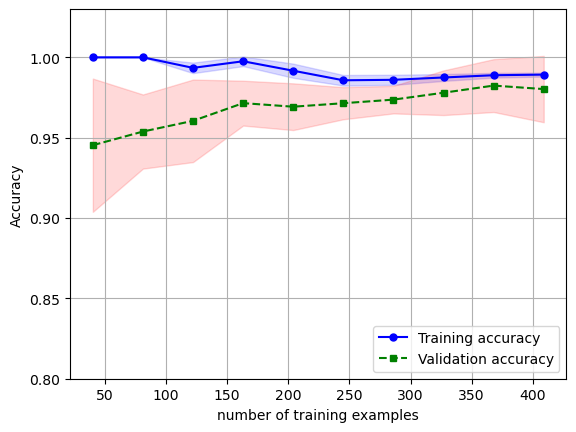

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X=df.iloc[:,2:].values 
y=df.iloc[:,1].values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 

pipe_lr = make_pipeline(
    StandardScaler()
    , PCA(n_components=2)
    ,LogisticRegression(random_state=1)
)

pipe_lr.fit(X_train,y_train)
y_pred=pipe_lr.predict(X_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)

from sklearn import  set_config
set_config(
    display='diagram'
)
from  sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(
    n_splits=10
).split(X_train,y_train)

scores=[]

for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(
        X_train[train]
        ,y_train[train]
    )
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)

# cross_val_score
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(
    estimator=pipe_lr
    , X=X_train
    ,y=y_train
    ,cv=10 # 10 k-fold
    ,n_jobs=1
)

# cross_validate()
from sklearn.model_selection import cross_validate

val_scores=cross_validate(
    estimator=pipe_lr
    ,X=X_train
    ,y=y_train
    ,scoring=['accuracy']
    ,cv=10
    ,n_jobs=-1
)

# cross_val_predict() 
from sklearn.model_selection import cross_val_predict
preds=cross_val_predict(
    estimator=pipe_lr
    ,X=X_train
    , y = y_train
    ,cv=10
    ,method='predict_proba'
    ,n_jobs=-1
)

# 학습 곡선
import matplotlib.pyplot as pt
from sklearn.model_selection import learning_curve

# 파이프 라인 설정
pipe_lr=make_pipeline(
    StandardScaler()
    ,LogisticRegression(
        penalty='l2'
        ,max_iter=10000
    )
)
train_sizes, train_scores, test_scores=learning_curve(
    estimator=pipe_lr
    ,X=X_train
    ,y=y_train
    ,train_sizes=np.linspace(0.1,1.0,10)
    ,cv=10
    ,n_jobs=1
)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

# 학습 데이터의 결과에 대한 선그래프
plt.plot(
    train_sizes # x축 : 훈련데이터 개수
    ,train_mean # y 축 : 정확도
    , color='blue'
    ,marker='o'
    ,markersize=5
    ,label='Training accuracy'
)
# 학습데이터 정확도에 대한 편차 그래프
plt.fill_between(
    x=train_sizes # x축
    ,y1=train_mean+train_std #y1축
    ,y2=train_mean-train_std #y2축
    ,alpha=0.15
    ,color='blue'
)

# 테스트데이터의 정확도에 대한 선그래프
plt.plot(
    train_sizes
    ,test_mean
    ,color='green'
    ,linestyle='--'
    ,marker='s'
    ,markersize=5
    ,label='Validation accuracy'
)

# 테스트데이터 정확도에 대한 편차 그래프
plt.fill_between(
    x=train_sizes # x축
    ,y1=test_mean+test_std #y1축
    ,y2=test_mean-test_std #y2축
    ,alpha=0.15
    ,color='red'
)

plt.ylim(
    [0.8,1.03]
)

plt.grid()
plt.xlabel('number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

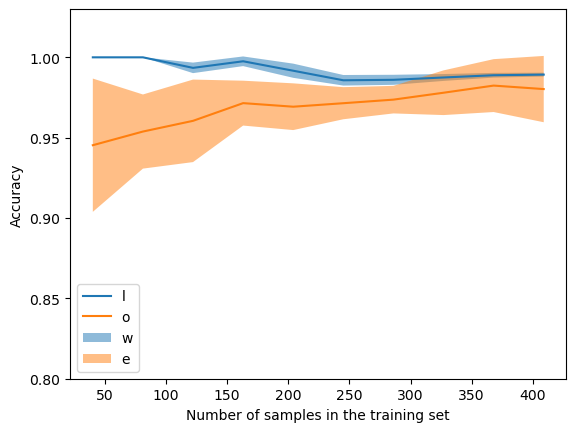

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X=df.iloc[:,2:].values 
y=df.iloc[:,1].values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 

pipe_lr = make_pipeline(
    StandardScaler()
    , PCA(n_components=2)
    ,LogisticRegression(random_state=1)
)

pipe_lr.fit(X_train,y_train)
y_pred=pipe_lr.predict(X_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)

from sklearn import  set_config
set_config(
    display='diagram'
)
from  sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(
    n_splits=10
).split(X_train,y_train)

scores=[]

for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(
        X_train[train]
        ,y_train[train]
    )
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)

# cross_val_score
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(
    estimator=pipe_lr
    , X=X_train
    ,y=y_train
    ,cv=10 # 10 k-fold
    ,n_jobs=1
)

# cross_validate()
from sklearn.model_selection import cross_validate

val_scores=cross_validate(
    estimator=pipe_lr
    ,X=X_train
    ,y=y_train
    ,scoring=['accuracy']
    ,cv=10
    ,n_jobs=-1
)

# cross_val_predict() 
from sklearn.model_selection import cross_val_predict
preds=cross_val_predict(
    estimator=pipe_lr
    ,X=X_train
    , y = y_train
    ,cv=10
    ,method='predict_proba'
    ,n_jobs=-1
)

# 학습 곡선
import matplotlib.pyplot as pt
from sklearn.model_selection import learning_curve

# 파이프 라인 설정
pipe_lr=make_pipeline(
    StandardScaler()
    ,LogisticRegression(
        penalty='l2'
        ,max_iter=10000
    )
)
train_sizes, train_scores, test_scores=learning_curve(
    estimator=pipe_lr
    ,X=X_train
    ,y=y_train
    ,train_sizes=np.linspace(0.1,1.0,10)
    ,cv=10
    ,n_jobs=1
)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

from sklearn.model_selection import LearningCurveDisplay
disp=LearningCurveDisplay(
    train_sizes=train_sizes
    ,train_scores=train_scores
    ,test_scores=test_scores
    ,score_name='Accuracy'
)
disp.plot(
    score_type='both'
)
plt.legend('lower right')
plt.ylim(
    [0.8,1.03]
)
plt.show()

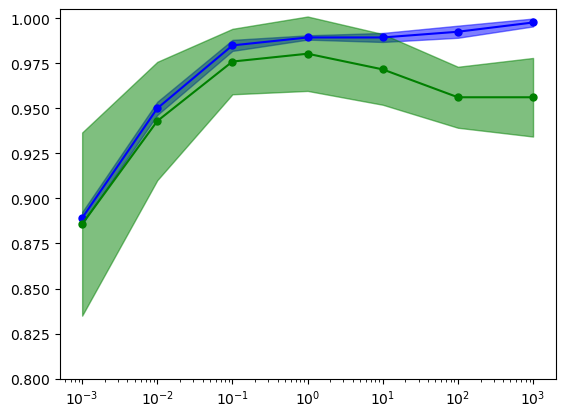

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X=df.iloc[:,2:].values 
y=df.iloc[:,1].values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 

pipe_lr = make_pipeline(
    StandardScaler()
    , PCA(n_components=2)
    ,LogisticRegression(random_state=1)
)

pipe_lr.fit(X_train,y_train)
y_pred=pipe_lr.predict(X_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)

from sklearn import  set_config
set_config(
    display='diagram'
)
from  sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(
    n_splits=10
).split(X_train,y_train)

scores=[]

for k,(train,test) in enumerate(kfold):
    pipe_lr.fit(
        X_train[train]
        ,y_train[train]
    )
    score=pipe_lr.score(X_train[test],y_train[test])
    scores.append(score)

# cross_val_score
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(
    estimator=pipe_lr
    , X=X_train
    ,y=y_train
    ,cv=10 # 10 k-fold
    ,n_jobs=1
)

# cross_validate()
from sklearn.model_selection import cross_validate

val_scores=cross_validate(
    estimator=pipe_lr
    ,X=X_train
    ,y=y_train
    ,scoring=['accuracy']
    ,cv=10
    ,n_jobs=-1
)

# cross_val_predict() 
from sklearn.model_selection import cross_val_predict
preds=cross_val_predict(
    estimator=pipe_lr
    ,X=X_train
    , y = y_train
    ,cv=10
    ,method='predict_proba'
    ,n_jobs=-1
)

# 학습 곡선
import matplotlib.pyplot as pt
from sklearn.model_selection import learning_curve

# 파이프 라인 설정
pipe_lr=make_pipeline(
    StandardScaler()
    ,LogisticRegression(
        penalty='l2'
        ,max_iter=10000
    )
)

# 검증 곡선 처리
from sklearn.model_selection import validation_curve

# 규제에 적용할 값을 리스토로 생성
# 그런데 이 값이 좋은 것인지 모름
# 첫번째 최적 값을 모른다. => 그리드 서치 사용 필요
# 정밀하게 처리하게 다른 패키지 사용이 필요 : hyperOpt
param_range=[
    0.001
    ,0.01
    ,0.1
    ,1.0
    ,10.0
    ,100.0
    ,1000.0
] # 정확한 값을 모름 더 작을수도 더 클수도 있고 리스트 안에 없을 수도 있음

# 검증 곡선 생성 : 베스트 C 값을 찾는게 목적이다.
train_scores, test_scores=\
    validation_curve(estimator=pipe_lr, # pipe_lr에 학습이 포함, 학습은 하지만 베스트모델 생성x
                     X=X_train,
                     y=y_train,
                     param_name='logisticregression__C',
                     param_range=param_range,                                           
                     cv=10
                     )


# 계산
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

# 차트
plt.plot(
    param_range
    ,train_mean
    ,color='blue'
    ,marker='o'
    ,markersize=5
    ,label='Training Accuracy'
)
plt.fill_between(
    param_range
    ,y1=train_mean+train_std
    ,y2=train_mean-train_std
    ,alpha=0.5
    ,color='blue'
)

plt.plot(
    param_range
    ,test_mean
    ,color='green'
    ,marker='o'
    ,markersize=5
    ,label='Test Accuracy'
)
plt.fill_between(
    param_range
    ,y1=test_mean+test_std
    ,y2=test_mean-test_std
    ,alpha=0.5
    ,color='green'
)
plt.xscale('log')
plt.ylim([0.8,1.005])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score
df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X=df.iloc[:,2:].values 
y=df.iloc[:,1].values

le=LabelEncoder()
y=le.fit_transform(y) 

X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

# 그리드 서치

pipe_svc=make_pipeline(
    StandardScaler()
    ,SVC(random_state=1) # 기본 모델 생성
)

param_range=[
    0.00001
    ,0.0001
    ,0.001
    ,0.01
    ,0.1
    ,1.0
    ,10.0
    ,100.0
    ,1000.0
    ,10000.0
]
param_grid=[
    {
        'svc__C': param_range,  
        'svc__kernel': ['linear']
    },
    {
        'svc__C': param_range, 
        'svc__gamma': param_range,  
        'svc__kernel': ['rbf']
    }
]


gridsearch=GridSearchCV( # 베스트 모델 : 베스트 파라미터에서 나온 성능을 평가
    estimator=pipe_svc
    ,param_grid=param_grid
    ,scoring='accuracy' # 성능을 평가
    ,cv=10
    ,refit=True
    ,n_jobs=-1
)

gridsearch.fit(X_train,y_train)

print(f'최적의 정확도 : {gridsearch.best_score_}')
print(f'최적의 파라미터 : {gridsearch.best_params_}')
print(f'최고의 모델의 예측값 :  {gridsearch.best_estimator_.predict(X_test)}')
print(f'테스트데이터 정확도 : {accuracy_score(gridsearch.best_estimator_.predict(X_test),y_test)}')

최적의 정확도 : 0.9846859903381642
최적의 파라미터 : {'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
최고의 모델의 예측값 :  [1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1]
테스트데이터 정확도 : 0.9736842105263158


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score
import scipy.stats
df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X=df.iloc[:,2:].values 
y=df.iloc[:,1].values

le=LabelEncoder()
y=le.fit_transform(y) 

X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

pipe_svc=make_pipeline(
    StandardScaler()
    ,SVC(random_state=1) # 기본 모델 생성
)



# 그리드 서치는 완전 탐색이기 때문에 사용자가 지정한 파라미터 그리드에 최적의 하이퍼파라미터가 포함되어 있다면 반드시 찾을 수 있지만, 하이퍼파라미터 그리드 설정이 크면 그리드 서치 비용이 많이 소요된다. 그래서 여러 파라미터 조합을 샘플링하는 랜덤 서치 방식이 더 효율적이다.
param_range=scipy.stats.loguniform(0.0001,1000.0)

param_grid=[
    {
        'svc__C': param_range,  
        'svc__kernel': ['linear']
    },
    {
        'svc__C': param_range, 
        'svc__gamma': param_range,  
        'svc__kernel': ['rbf']
    }
]

rs=RandomizedSearchCV(
    estimator=pipe_svc
    ,param_distributions=param_grid
    ,scoring='accuracy'
    ,refit=True
    ,n_iter=20
    ,cv=10
    ,random_state=1
    ,n_jobs=-1
)
rs=rs.fit(X_train,y_train)

print(f'최적의 정확도 : {rs.best_score_}')
print(f'최적의 파라미터 : {rs.best_params_}')
print(f'최고의 모델의 예측값 :  {rs.best_estimator_.predict(X_test)}')
print(f'테스트데이터 정확도 : {accuracy_score(rs.best_estimator_.predict(X_test),y_test)}')

최적의 정확도 : 0.9780676328502416
최적의 파라미터 : {'svc__C': 0.05971247755848464, 'svc__kernel': 'linear'}
최고의 모델의 예측값 :  [1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1]
테스트데이터 정확도 : 0.9736842105263158


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score

df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

le=LabelEncoder()
y=le.fit_transform(y)

X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

pipe_svc=make_pipeline(
    StandardScaler()
    ,SVC(random_state=1) # 기본 모델 생성
)

pipe_svc.fit(X_train,y_train) # 학습 처리
y_pred=pipe_svc.predict(X_test)
from sklearn.metrics import confusion_matrix

confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
print(y_test)
print(y_pred)

[[71  1]
 [ 2 40]]
[1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1]
[1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1]


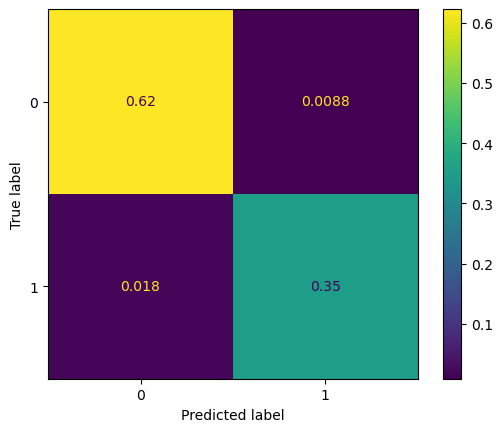

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score

df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

le=LabelEncoder()
y=le.fit_transform(y)

X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

pipe_svc=make_pipeline(
    StandardScaler()
    ,SVC(random_state=1) # 기본 모델 생성
)

pipe_svc.fit(X_train,y_train) # 학습 처리
y_pred=pipe_svc.predict(X_test)
from sklearn.metrics import confusion_matrix

confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

# ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipe_svc,
                                      X_test,
                                      y_test,
                                      normalize='all')
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score

df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

le=LabelEncoder()
y=le.fit_transform(y)

X_train, X_test, y_train,y_test=train_test_split(
    X
    ,y
    ,test_size=0.2
    ,stratify=y
    ,random_state=1
)

pipe_svc=make_pipeline(
    StandardScaler()
    ,SVC(random_state=1) # 기본 모델 생성
)

pipe_svc.fit(X_train,y_train) # 학습 처리
y_pred=pipe_svc.predict(X_test)

# 정밀도(예측), 재현율(실제), f1
# 재현율 : 암진단, 금융사기 (놓치면 위험한 경우)
# 정밀도 : 스팸 매일, 추천시스템(잘못 긍정 예측시 비용이 큰 경우)
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score_=precision_score(y_true=y_test,y_pred=y_pred)
print(f'정밀도(positive 예측) : {precision_score_}')
recall_score_=recall_score(y_true=y_test,y_pred=y_pred)
print(f'재현율 : {recall_score_}')
f1_score_=f1_score(y_true=y_test,y_pred=y_pred)
print(f'f1 : {f1_score_}')

정밀도(positive 예측) : 0.975609756097561
재현율 : 0.9523809523809523
f1 : 0.963855421686747


In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
all_=classification_report(y_true=y_test, y_pred=y_pred)
print(all_)

# classification_report를 DataFrame으로 반환
report = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)

# DataFrame으로 변환 후 소수점 3자리로 포맷팅
report_df = pd.DataFrame(report).transpose()
report_df = report_df.round(3)  # 소수점 3자리로 반올림

print(report_df)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

              precision  recall  f1-score  support
0                 0.973   0.986     0.979   72.000
1                 0.976   0.952     0.964   42.000
accuracy          0.974   0.974     0.974    0.974
macro avg         0.974   0.969     0.972  114.000
weighted avg      0.974   0.974     0.974  114.000


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score

df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)

# Under-sampling using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)
print("Under-sampled class distribution:", np.bincount(y_under_resampled))

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_over_resampled, y_over_resampled = smote.fit_resample(X, y)
print("Over-sampled class distribution:", np.bincount(y_over_resampled))

from imblearn.combine import SMOTETomek
smote_tomek=SMOTETomek(random_state=42)
X_combine_resampled,y_combine_resampled=smote_tomek.fit_resample(X,y)
print(np.bincount(y_combine_resampled))

Under-sampled class distribution: [212 212]
Over-sampled class distribution: [357 357]
[348 348]


c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
c:\ProgramData\anaconda3\envs\pyml\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn develope